In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
%cd /content/drive/MyDrive/SIH

/content/drive/MyDrive/SIH


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

Area:  [0.0, 3.0, 2.0, 8.0, 2.5, 8.5, 6.0, 9.5, 3.5, 0.5, 6.5, 6.0, 1.0, 0.0, 4.0, 22.5, 5.0, 30.5, 6.0, 0.0, 4.0, 18.5, 10.5, 5.5, 7.0, 18.0, 15.5, 2.5, 21.0, 1.0, 1.0, 9.0, 59.5, 1.0, 1.0, 2.5, 94.0, 77.5, 24.5, 42.0, 105.0, 14.5, 27.5, 1.0, 3.0, 22.0, 6.0, 7.0, 8.0, 6.5, 12.0, 2.5, 16.0, 7.0, 19.5, 23.5, 35.0, 28.5, 20.5, 30.5, 6.5, 6.0, 0.5, 16.5, 20.0, 22.5, 11.5, 2.0, 6.0, 9.5, 9.0, 5.5, 9.0, 19.5, 11.5, 48.0, 56.5, 5.5, 7.0, 3.5, 15.5, 0.0, 10.5, 36.5, 48.0, 9.0, 4.5, 17.0, 23.5, 3.0, 0.5, 10.0, 4.0, 9.0, 2.0, 14.5, 9.5, 17.0, 8.0, 0.5, 12.0, 13.0, 19.0, 0.0, 14.5, 2.5, 6.0, 18.0, 10.5, 14.5, 17.0, 0.0, 63.0, 1.5, 8.5, 2.5, 4.0, 2.5, 5.0, 1.5, 3.5, 0.5, 43.5, 0.0, 0.0, 4.0, 51.5, 13.0, 26.0, 16.5, 34.5, 26.5, 4.5, 2.5, 1.5, 44.0, 4.0, 0.0, 9.5, 37.0, 3.5, 15.5, 13.5, 94.5, 522.0, 544.5, 2.0, 49.5, 8.0, 5.0, 11.0, 19.0, 7.5, 52.5, 46.0, 42.0, 57.5, 23.5, 55.0, 47.0, 21.5, 5.0, 3.5, 21.5, 13.0, 45.5, 8.5, 57.0, 47.0, 49.0, 11.0, 28.5, 35.0, 16.5, 0.0, 14.5, 28.0, 5.5, 8.0, 4.0, 1.

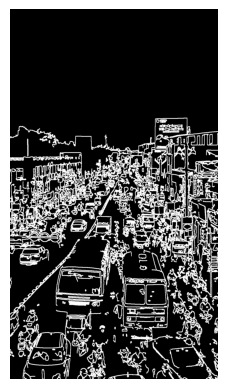

In [92]:
def contours_detector(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blank = np.zeros(img.shape[:2], dtype='uint8')
    blurred_image = cv.GaussianBlur(gray, (5, 5), 0)

    edges = cv.Canny(blurred_image, 50, 150)

    contours, hierarchy = cv.findContours(edges, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    count = len(contours)
    area = [cv.contourArea(contour) for contour in contours]
    print("Area: ",area)

    vehicle_contours = [cnt for cnt in contours if 400 < cv.contourArea(cnt) < 1200]
    vehicle_count = len(vehicle_contours)
    print("Vehicle count: ", vehicle_count)

    cv.drawContours(blank, contours, -1, (255), thickness=2)
    blank = cv.dilate(blank, (3,3), iterations=1)

    return blank, count

image = cv.imread('/content/drive/MyDrive/SIH/Images/02/06.jpg')
blank, count = contours_detector(image)
print("Contour count: ", count)

plt.imshow(blank, cmap='gray')
plt.axis('off')
plt.show()

In [91]:
min_list = []
min_folder = []
for f in os.listdir('Images'):
    f_path = os.path.join('Images', f)
    if os.path.isdir(f_path):
        min_count = []
        fol_num = []
        for l in os.listdir(f_path):
            l_path = os.path.join(f_path, l)
            parts = l_path.split(".")[0].split('/')

            image = cv.imread(l_path)
            blank, count = contours_detector(image)

            min_count.append(count)
            fol_num.append(int(parts[-1]))

        min_list.append(np.min(min_count))
        min_folder.append(fol_num[np.argmin(min_count)])

print(min_folder)


[17, 20, 0, 15, 17, 3, 18, 2, 0, 19, 0, 15, 3]


In [ ]:
video_list = []
for i, f in enumerate(os.listdir('Images')):
    f_path = os.path.join('Images', f)
    if os.path.isdir(f_path):
        vehicle_area = []
        for l in os.listdir(f_path):
            l_path = os.path.join(f_path, l)

            image = cv.imread(l_path)
            blank, count = contours_detector(image)

            vehicle_area.append(count - min_list[i])
        video_list.append(vehicle_area)

print(video_list)


[[1202, 1073, 864, 662, 228, 915, 555, 144, 1005, 902, 170, 0, 63, 65, 395, 59, 429, 783, 816, 650, 568], [0, 631, 410, 1, 120, 535, 335, 35, 431, 129, 241, 442, 416, 500, 434, 483, 442, 545, 571, 599, 587], [132, 332, 169, 66, 344, 244, 163, 294, 230, 45, 69, 432, 286, 241, 478, 0, 183, 161, 277, 152], [222, 0, 204, 292, 391, 735, 432, 123, 833, 955, 1009, 1057, 420, 984, 1195, 1048, 923, 1017, 1062, 998], [81, 449, 144, 63, 0, 77, 124, 379, 382, 528, 689, 469, 772, 703, 520, 568, 798, 928, 856, 694], [527, 240, 607, 305, 348, 632, 616, 806, 388, 361, 1100, 1228, 831, 737, 613, 145, 31, 651, 514, 0], [184, 566, 395, 32, 0, 76, 250, 134, 409, 374, 413, 387, 364, 483, 512, 468, 474, 453, 342, 586], [768, 634, 399, 688, 471, 208, 501, 232, 480, 598, 564, 261, 128, 5, 0, 304, 602, 372, 841, 453], [1248, 341, 885, 509, 1016, 626, 951, 978, 654, 0, 66, 690, 489, 137, 440, 331, 608, 596, 302, 895], [171, 539, 820, 892, 888, 756, 861, 935, 800, 0, 784, 132, 906, 71, 85, 170, 469, 311, 500, 77